In [4]:
from math import *

In [5]:
var('x y vx vy m G')

def orbita(x,y,vx,vy,m,G,dt,n_iter):
        L = [(x,y)]
        for j in range(n_iter):
            distancia = sqrt(x**2+y**2)
            Fx = -x*G*m/distancia**3    #Ley de Gravitacion de Newton-La constante G incluye la masa de Sol y la constante universal de gravitacion
            Fy = -y*G*m/distancia**3
            x += dt * vx             #Actualizamos la posicion usando la definicion de velocidad
            y += dt * vy
            vx += dt * Fx / m        #Actualizamos la velocidad usando la segunda Ley de Newton F = m.a
            vy += dt * Fy / m
            L.append((x,y))
        return L

CPU times: user 224 ms, sys: 8 ms, total: 232 ms
Wall time: 222 ms


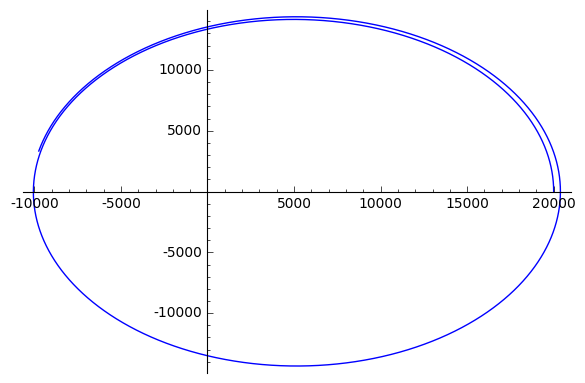

In [34]:
%time SOL = orbita(20000.0,0.0,0.0,0.01,1.0,3.0,1000,10000)
line2d(SOL)

In [8]:
%%cython
def orbita_cy(double x,double y,double vx,double vy,double m,double G,double dt,int n_iter):
        cdef long j
        L = [(x,y)]
        for j in range(n_iter):
            distancia = sqrt(x**2+y**2)
            Fx = -x*G*m/distancia**3
            Fy = -y*G*m/distancia**3
            x += dt*vx
            y += dt*vy
            vx += dt*Fx/m
            vy += dt*Fy/m
            L.append((x,y))
        return L

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.25 ms


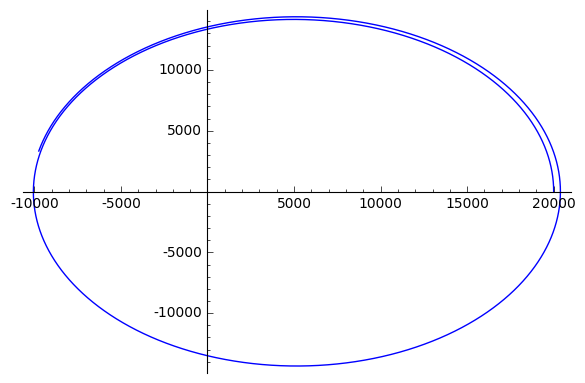

In [35]:
%time SOL = orbita_cy(20000.0,0.0,0.0,0.01,1.0,3.0,1000,10000)
line2d(SOL)

<h4>Comentarios:</h4>
<ol>
<li>Estamos resolviendo, en forma num&eacute;rica, la ecuaci&oacute;n diferencial de Newton $F(\mathbf{r}(t))= m \frac{d^2 \mathbf{r}(t)}{d^2t}$, con $F$ el vector de fuerza dado por la ley de gravitaci&oacute;n universal de Newton y $\mathbf{r}(t)$ el vector de posici&oacute;n del planeta con respecto al Sol en el origen. Como la ecuaci&oacute;n diferencial es una igualdad entre dos vectores, se puede estudiar igualando componente a componente, y eso es lo que se hace en el programa. </li>
<li>La &oacute;rbita del planeta no se cierra debido a que el m&eacute;todo por el que se resuelve la ecuaci&oacute;n diferencial es muy primitivo y se producen errores que se acumulan. Uno de los problemas fundamentales del C&aacute;lculo Num&eacute;rico trata de obtener buenos m&eacute;todos para la resoluci&oacute;n num&eacute;rica de las ecuaciones diferenciales. </li>
<li>Con estos par&aacute;metros, la &oacute;rbita es pr&aacute;cticamente circular con el Sol en el centro. &iquest;C&oacute;mo variar alguno de los par&aacute;metros para obtener algo m&aacute;s parecido a elipses con el Sol en un foco?</li>
<li>En este ejemplo las mejoras obtenidas con Cython no son muy relevantes porque usando Sage el tiempo es menor que 25 cent&eacute;simas de segundo. A&uacute;n as&iacute; la mejora es en un factor mayor que 25.</li>
</ol>

CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 4.46 ms


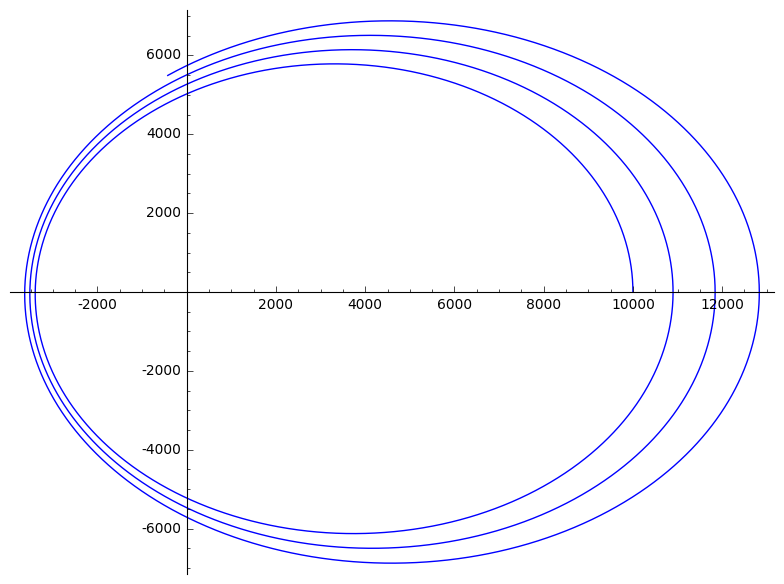

In [11]:
%time SOL = orbita_cy(10000.0,0.0,0.0,0.01,1.0,2.0,1000,10000)
line2d(SOL)

## Integrador simpléctico

In [15]:
%%cython

import numpy as np
cimport numpy as np

cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
def symplectic(int runs=10**6,np.float64_t e=0.00001):
    cdef np.ndarray[np.float64_t,ndim=2]r = np.empty((runs,2),dtype=np.float64) 
    cdef np.ndarray[np.float64_t,ndim=2] p = np.empty((runs,2),dtype=np.float64)
    
    cdef np.float64_t[:,:] rv = r
    cdef np.float64_t[:,:] pv = p
    
    cdef int i,j
    
    r0 = [0.5,0]
    p0 = [0,1.63]
    
    for j in range(r.shape[1]):
        rv[0,j] = r0[j]
        pv[0,j] = p0[j]
    
    for i in range(1,runs):
        for j in range(r.shape[1]):
            pv[i,j] = pv[i - 1,j] - e * (rv[i - 1,0]**2 + rv[i - 1,1]**2)**(-1.5)*rv[i - 1,j]
            rv[i,j] = rv[i - 1,j] + e * pv[i - 1,j]

    return r,p

In [47]:
R,P = symplectic()

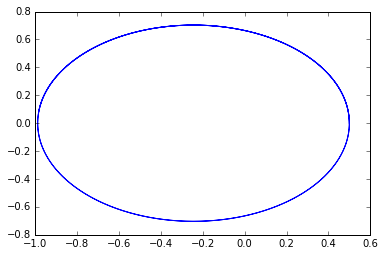

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(*R.T)

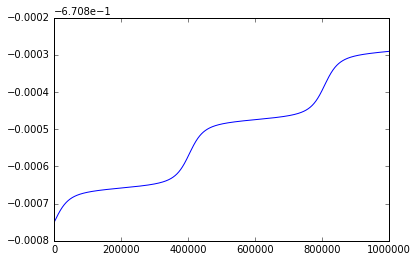

In [18]:
# Energia
plt.plot([(P[i]**2).sum() / 2 - 1/(np.sqrt((R[i]**2).sum())) for i in range(R.shape[0])])